In [1]:
import numpy as np
import torch 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from entropyLibDC import *
import matplotlib.pyplot as plt

In [2]:
data_dict=torch.load('data_for_classificationV2.pt')
data=data_dict['reshaped_set']

In [3]:
# Support Vector Machine
x=data[:,:-1].numpy()
y=data[:,-1].numpy()


In [4]:
fabrics_name=[r'Nodal Connection Degree Skewness, $\alpha_{N_d}$',
        r'Nodal Connection Degree Kurtosis, $k_{N_d}$',
        r'Nodal Connection Degree Entropy, $H_{N_d}$',
        
        r'Nodal Clustering Coefficient Skewness, $\alpha_{C_v}$',
        r'Nodal Clustering Coefficient Kurtosis, $k_{C_v}$',
        r'Nodal Clustering Coefficient Entropy, $H_{C_v}$',

        r'Area Strength Skewness, $\alpha_{S}$',
        r'Area Strength Kurtosis, $k_{S}$',
        r'Area Strength Entropy, $H_{S}$',

        r'Area Betweenness Centrality Skewness, $\alpha_{g_A}$',
        r'Area Betweenness Centrality Kurtosis, $k_{g_A}$',
        r'Area Betweenness Centrality Entropy, $H_{g_A}$',

        r'Local Efficiency Skewness, $\alpha_{e_l}$',
        r'Local Efficiency Kurtosis, $k_{e_l}$',
        r'Local Efficiency Entropy, $H_{e_l}$',

        r'Eccentrincity Skewness, $\alpha_{E}$',
        r'Eccentrincity Kurtosis, $k_{E}$',
        r'Eccentrincity Entropy, $H_{E}$', 

        r'Closeness Centrality Skewness, $\alpha_{C}$',
        r'Closeness Centrality Kurtosis, $k_{C}$',
        r'Closeness Centrality Entropy, $H_{C}$', ]

fabric_notation=[r'$\alpha_{N_d}$',
        r'$k_{N_d}$',
        r'$H_{N_d}$',
        
        r'$\alpha_{C_v}$',
        r'$k_{C_v}$',
        r'$H_{C_v}$',

        r'$\alpha_{S}$',
        r'$k_{S}$',
        r'$H_{S}$',

        r'$\alpha_{g_A}$',
        r'$k_{g_A}$',
        r'$H_{g_A}$',

        r'$\alpha_{e_l}$',
        r'$k_{e_l}$',
        r'$H_{e_l}$',

        r'$\alpha_{E}$',
        r'$k_{E}$',
        r'$H_{E}$', 

        r'$\alpha_{C}$',
        r'$k_{C}$',
        r'$H_{C}$', ]

# Mutual Information

In [5]:
_,d=x.shape
mi_matrix=np.zeros([d,d])
for i in range(d):
    for j in range(i+1,d):
        mi_matrix[i,j]=Mutual_Information(x[:,i],x[:,j])
#Mutual_Information(x[:,3],x[:,3])

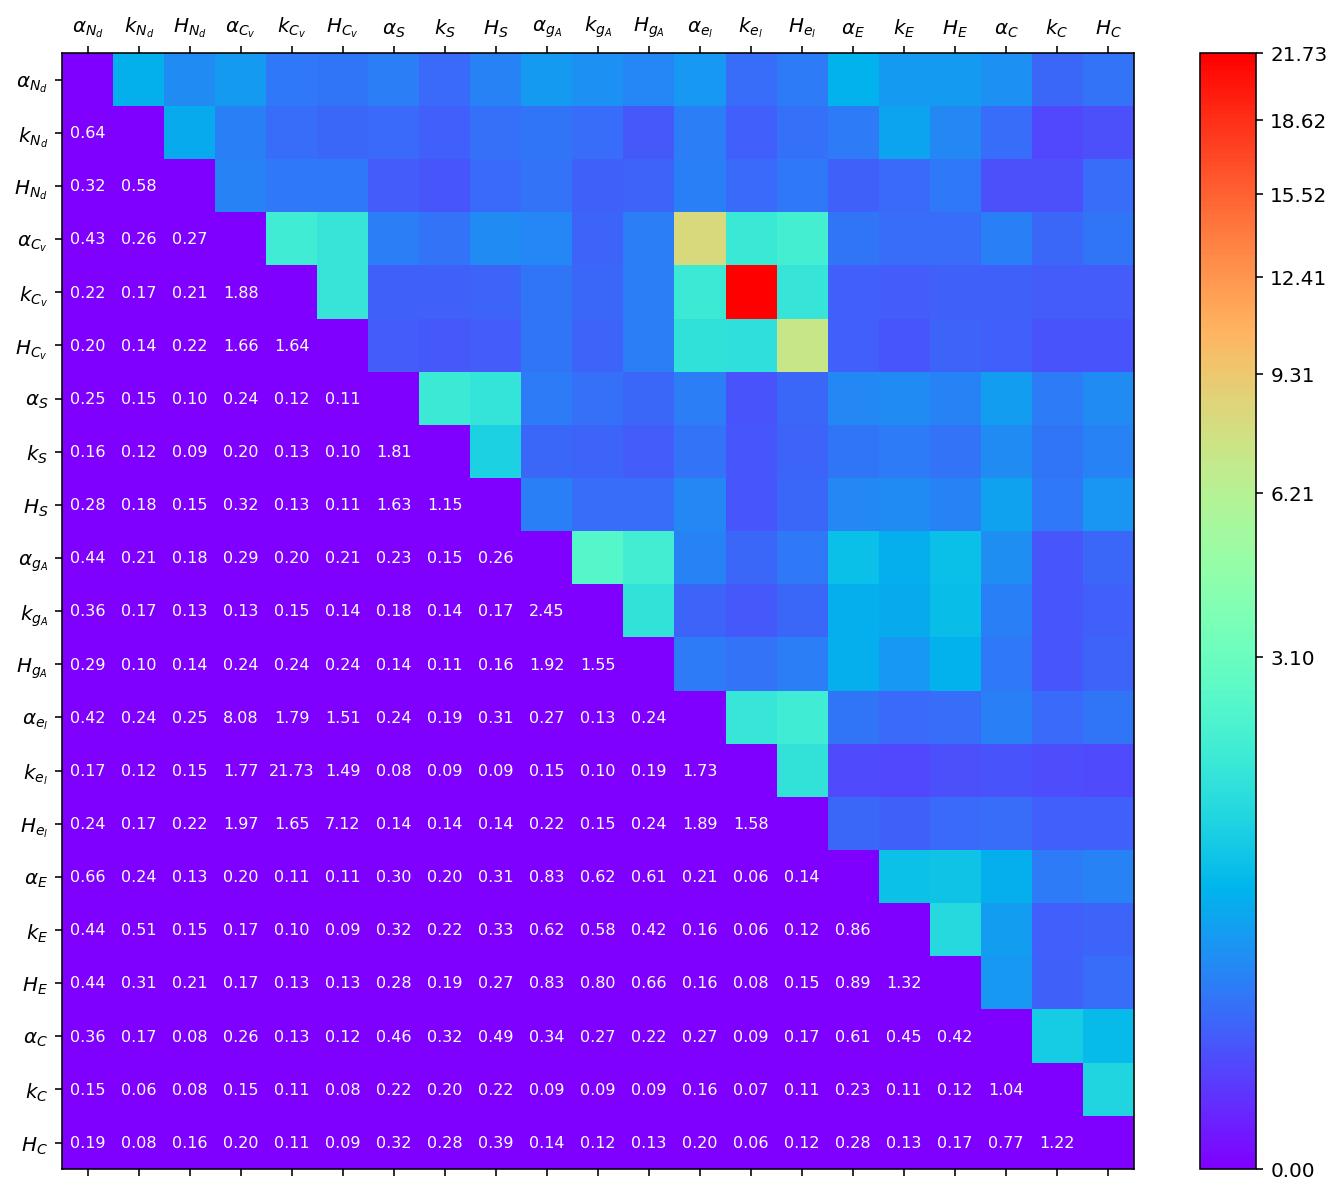

In [36]:
# Plotting the matrix
from matplotlib.colors import LogNorm,PowerNorm
# Plotting the matrix
plt.figure(figsize=(12, 10), dpi=144)
cax = plt.matshow(mi_matrix, cmap='rainbow', fignum=1, aspect='auto', norm=PowerNorm(gamma=0.4, vmin=mi_matrix.min(), vmax=mi_matrix.max()))
plt.colorbar(cax, ticks=np.linspace(0, mi_matrix.max(), 8))
plt.xticks(ticks=np.arange(len(fabric_notation)), labels=fabric_notation, rotation=0)
plt.yticks(ticks=np.arange(len(fabric_notation)), labels=fabric_notation)

# Adding text annotations
for i in range(d):
    for j in range(i + 1, d):
        plt.text(i, j, f'{mi_matrix[i, j]:.2f}', ha='center', va='center', color='white', fontsize=8)

plt.show()

# ANOVA test

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif

# Example data setup
# X: feature matrix with shape (n_samples, n_features)
# y: target vector with shape (n_samples,)

# Number of features to select
k = 18

# Create the SelectKBest with the ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=k)

# Fit to the training data
selector.fit(x, y)

# Get the scores and p-values of the features
scores = selector.scores_
p_values = selector.pvalues_

# Print the scores and p-values for each feature
for i in range(x.shape[1]):
    print(f"Feature {fabrics_name[i]}: Score = {scores[i]}, p-value = {p_values[i]}")

# Get the mask of the selected features
#features_selected_mask = selector.get_support()
#print("\nSelected features mask:", features_selected_mask)

# If you want to see which features are selected, and their corresponding scores and p-values:
#print("\nSelected features:")
#for i, (score, p_value, is_selected) in enumerate(zip(scores, p_values, features_selected_mask)):
#    if is_selected:
#        print(f"Feature {i+1}: Score = {score}, p-value = {p_value}, Selected = {is_selected}")

Feature Nodal Connection Degree Skewness, $\alpha_{N_d}$: Score = 82.71120876072689, p-value = 1.2682734662223597e-19
Feature Nodal Connection Degree Kurtosis, $k_{N_d}$: Score = 1002.6151150782578, p-value = 1.2953816000267733e-203
Feature Nodal Connection Degree Entropy, $H_{N_d}$: Score = 462.21289426606074, p-value = 7.867209043163438e-99
Feature Nodal Clustering Coefficient Skewness, $\alpha_{C_v}$: Score = 1083.19746774805, p-value = 1.5544857624036107e-218
Feature Nodal Clustering Coefficient Kurtosis, $k_{C_v}$: Score = 907.6615711977605, p-value = 8.275473869847075e-186
Feature Nodal Clustering Coefficient Entropy, $H_{C_v}$: Score = 1737.8720794792864, p-value = 0.0
Feature Area Strength Skewness, $\alpha_{S}$: Score = 1376.0145812640994, p-value = 2.367281760217134e-271
Feature Area Strength Kurtosis, $k_{S}$: Score = 777.0695425553807, p-value = 6.5104077183726155e-161
Feature Area Strength Entropy, $H_{S}$: Score = 1645.6447455803434, p-value = 3.70965e-318
Feature Area Be

In [37]:
def select_features(x,mi_matrix,scores,threshold=1):
    features_delete_mask_dupli=[]
    high_corr = np.where(np.abs(mi_matrix) > threshold)
    high_corr_pairs = [(i, j) for i, j in zip(*high_corr) if i != j and i < j]
    # Remove features based on lower F-scores
    for i, j in high_corr_pairs:
        if scores[i] < scores[j]:
            features_delete_mask_dupli.append(i)  # Remove feature i
        else:
            features_delete_mask_dupli.append(j)  # Remove feature j
    features_delete_mask=np.unique(features_delete_mask_dupli)
    all_features = np.arange(x.shape[1])

    # Mask of features to keep
    features_keep_mask = np.isin(all_features, features_delete_mask, invert=True)
    return features_keep_mask

In [38]:
I_trlist=[2.8,2,1.5,1,0.8,0.6,0.4,0.2,0.1,0.05]
#threshold=2
for threshold in I_trlist:
    features_keep_mask=select_features(x,mi_matrix,scores,threshold=threshold)

    # Optionally print out the selected features for verification
    selected_features_names = np.array(fabric_notation)[features_keep_mask]

    x_selec=x[:,features_keep_mask]
    y_selec=y
    #xs_norm=(x_selec-x_selec.mean(0))/x_selec.std(0)
    Xs_train, Xs_test, ys_train, ys_test = train_test_split(x_selec, y_selec, test_size=0.30, random_state=4500)
    #Xs_train, Xs_test, ys_train, ys_test = train_test_split(xs_norm, y_selec, test_size=0.30, random_state=2355)
    clf = SVC(kernel='rbf', C=10, gamma=0.01)
    clf.fit(Xs_train, ys_train)
    ys_pred = clf.predict(Xs_test)
    #print(confusion_matrix(ys_test, ys_pred))
    #print(classification_report(ys_test, ys_pred))
    train_accuracys = clf.score(Xs_train, ys_train)
    test_accuracys = clf.score(Xs_test, ys_test)
    print(f'MI threshold: {threshold}')
    print("Selected features num:", len(selected_features_names))
    print("Selected features:", selected_features_names)
    
    print(f'Training Accuracy: {train_accuracys}')
    print(f'Test Accuracy: {test_accuracys}')
    print('===============================')

MI threshold: 2.8
Selected features num: 18
Selected features: ['$\\alpha_{N_d}$' '$k_{N_d}$' '$H_{N_d}$' '$\\alpha_{S}$' '$k_{S}$'
 '$H_{S}$' '$\\alpha_{g_A}$' '$k_{g_A}$' '$H_{g_A}$' '$\\alpha_{e_l}$'
 '$k_{e_l}$' '$H_{e_l}$' '$\\alpha_{E}$' '$k_{E}$' '$H_{E}$'
 '$\\alpha_{C}$' '$k_{C}$' '$H_{C}$']
Training Accuracy: 0.944047619047619
Test Accuracy: 0.9238888888888889
MI threshold: 2
Selected features num: 17
Selected features: ['$\\alpha_{N_d}$' '$k_{N_d}$' '$H_{N_d}$' '$\\alpha_{S}$' '$k_{S}$'
 '$H_{S}$' '$k_{g_A}$' '$H_{g_A}$' '$\\alpha_{e_l}$' '$k_{e_l}$'
 '$H_{e_l}$' '$\\alpha_{E}$' '$k_{E}$' '$H_{E}$' '$\\alpha_{C}$' '$k_{C}$'
 '$H_{C}$']
Training Accuracy: 0.9442857142857143
Test Accuracy: 0.9261111111111111
MI threshold: 1.5
Selected features num: 12
Selected features: ['$\\alpha_{N_d}$' '$k_{N_d}$' '$H_{N_d}$' '$H_{S}$' '$k_{g_A}$'
 '$H_{e_l}$' '$\\alpha_{E}$' '$k_{E}$' '$H_{E}$' '$\\alpha_{C}$' '$k_{C}$'
 '$H_{C}$']
Training Accuracy: 0.9221428571428572
Test Accuracy: 0.905

In [15]:
len(selected_features_names)


17

In [17]:
features_keep_mask

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [88]:
import numpy as np
from scipy import stats

# Example data
x1 = x[:,-7]  # Your feature
  # Your target variable

# Compute means and variances
group_means = [np.mean(x1[y == label]) for label in np.unique(y)]
overall_mean = np.mean(x1)

# Between-group variability
ss_between = sum(len(x1[y == label]) * (mean - overall_mean)**2 for label, mean in zip(np.unique(y), group_means))

# Within-group variability
ss_within = sum(sum((x1[y == label] - mean)**2) for label, mean in zip(np.unique(y), group_means))

# Degrees of freedom
df_between = len(group_means) - 1
df_within = len(x1) - len(group_means)

# Calculate the F-score
F = (ss_between / df_between) / (ss_within / df_within)

# Obtain p-value
p_value = stats.f.sf(F, df_between, df_within)

print("F-score:", F)
print("p-value:", p_value)


F-score: 28.269552109123204
p-value: 1.093598576328666e-07


In [92]:
[sum((x1[y == label] - mean)**2) for label, mean in zip(np.unique(y), group_means)]

[1779.8376042245266, 910.6733440711023]